In [1]:
# set project root to correct path
import sys
import os

proj_path = '/mnt/samba/research/shield/projects/payamfz/medical-ssl-segmentation/mycode'
if proj_path not in sys.path:
  sys.path.append(proj_path)

from set_path import set_path
set_path()

print(sys.path)
print(os.getcwd())

setting cwd to '/mnt/samba/research/shield/projects/payamfz/medical-ssl-segmentation'
['/mnt/samba/research/shield/projects/payamfz/medical-ssl-segmentation/mycode/jupyter', '/home/payam/miniconda3/envs/tf2-gpu/lib/python39.zip', '/home/payam/miniconda3/envs/tf2-gpu/lib/python3.9', '/home/payam/miniconda3/envs/tf2-gpu/lib/python3.9/lib-dynload', '', '/home/payam/miniconda3/envs/tf2-gpu/lib/python3.9/site-packages', '/mnt/samba/research/shield/projects/payamfz/medical-ssl-segmentation/mycode']
/mnt/samba/research/shield/projects/payamfz/medical-ssl-segmentation


In [2]:
import matplotlib.pyplot as plt
import numpy as np

from loader.mimic_cxr_jpg_loader import MIMIC_CXR_JPG_Loader
from utils.augmentation import preprocess_image

BATCH_SIZE = 5

def _preprocess(x, y, info=None):
    out = {}
    out['image'] = preprocess_image(
        x, 448, 448, is_training=False, color_distort=False, crop='Center')
    out['label'] = y
    out['info'] = info
    return out


2024-03-12 13:17:37.384502: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-12 13:17:37.962478: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-12.3/lib64:/home/payam/miniconda3/envs/tf2-gpu/lib/
2024-03-12 13:17:37.962573: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-12.3/lib64:/home/payam/miniconda3/envs/tf2-gpu

In [3]:
myCustomDataLoader = MIMIC_CXR_JPG_Loader({'train': 1000, 'validate': 100, 'test': 100}, proj_path + '/..')
train_tfds, val_tfds, test_tfds = myCustomDataLoader.load()
class_names = myCustomDataLoader.info()['class_names']
print(myCustomDataLoader.metadata)

2024-03-12 13:17:43.616133: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-12 13:17:43.648294: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-12 13:17:43.648457: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-12 13:17:43.648956: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

{'num_classes': 7, 'class_names': array(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Pleural Effusion', 'Pneumonia', 'Pneumothorax'], dtype='<U16'), 'total_size': 377110, 'split_size': {'train': 1000, 'validate': 100, 'test': 100}, 'split_size_frac': {'train': 0.002651746174856143, 'validate': 0.00026517461748561426, 'test': 0.00026517461748561426}}


In [4]:
# TEST 1: ------- Test Train dataset -------
batched_tfds = train_tfds.shuffle(buffer_size=2*BATCH_SIZE).map(_preprocess).batch(BATCH_SIZE)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
# TEST 2: ------- Test Validation dataset -------
batched_tfds = val_tfds.shuffle(buffer_size=2*BATCH_SIZE).map(_preprocess).batch(BATCH_SIZE)

In [10]:
# TEST 3: ------- Test dataset filtering -------
filtered_train_tfds, filtered_val_tfds, filtered_test_tfds = myCustomDataLoader.load(['frontal_view', 'has_label', 'unambiguous_label'])
batched_tfds = filtered_train_tfds.shuffle(buffer_size=2*BATCH_SIZE).map(_preprocess).batch(BATCH_SIZE)

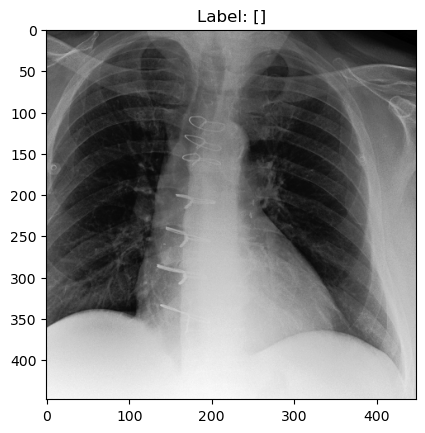

patient ^: {'subject_id': b'19780933', 'study_id': b'52632163', 'dicom_id': b'1e692140-db6fb413-2fa719f2-b9baa533-40f21b32'}




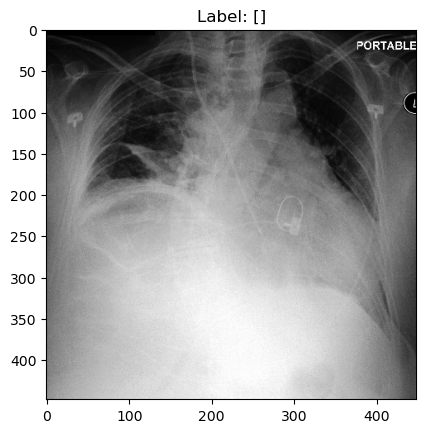

patient ^: {'subject_id': b'19631417', 'study_id': b'57519417', 'dicom_id': b'81562165-d9b54bf7-d9c18f74-a6dcce5b-652c9940'}




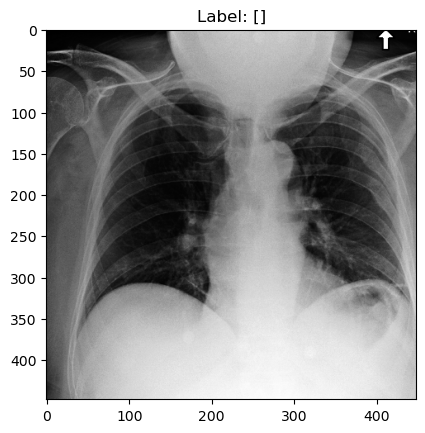

patient ^: {'subject_id': b'16403314', 'study_id': b'52040222', 'dicom_id': b'8002f7f5-0afbc292-4c0d7cd6-2d367e09-3cab5800'}




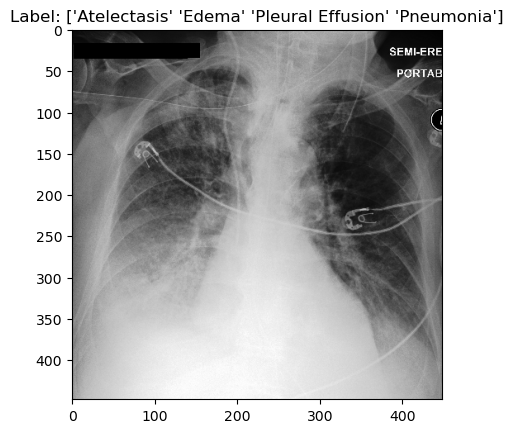

patient ^: {'subject_id': b'13611526', 'study_id': b'59990335', 'dicom_id': b'fc69aa27-504a1260-dbb6fdef-98648e8e-bf572519'}




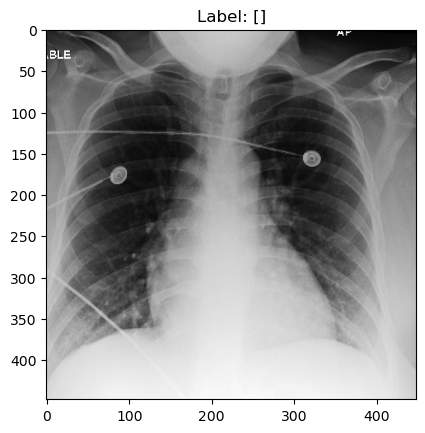

patient ^: {'subject_id': b'13269859', 'study_id': b'55243317', 'dicom_id': b'237cde94-7450dc10-0437b133-761b269c-e8cc392b'}




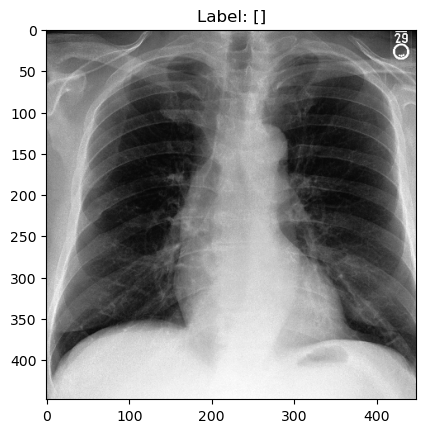

patient ^: {'subject_id': b'10743678', 'study_id': b'54525833', 'dicom_id': b'22e0058d-bd2a4da7-5b14a40b-7b4f97b6-1739ba8e'}




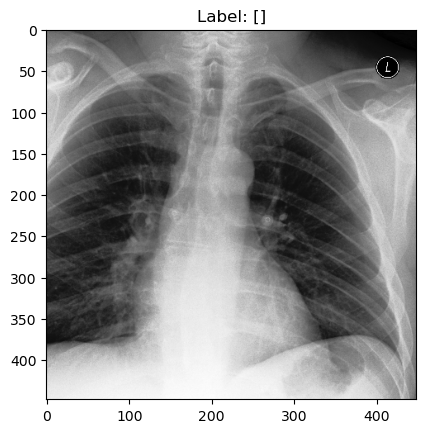

patient ^: {'subject_id': b'14397935', 'study_id': b'52486647', 'dicom_id': b'50dcd10f-dae76be0-c0cececf-51760f5a-a34e44ca'}




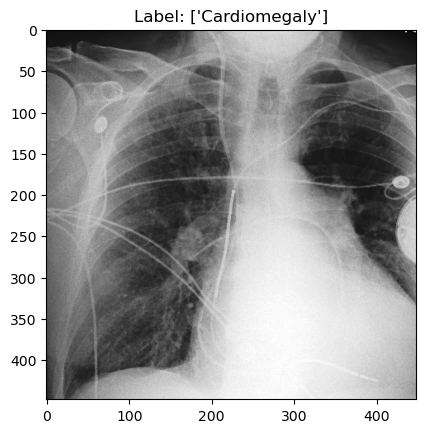

patient ^: {'subject_id': b'18995174', 'study_id': b'50818159', 'dicom_id': b'86da85f4-13684538-5591e53c-1a18c965-cdcff6c0'}


**** has ambiguous label


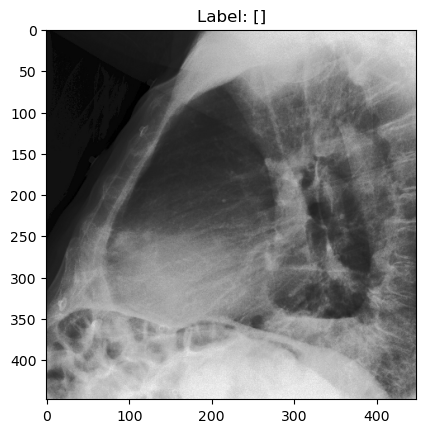

patient ^: {'subject_id': b'16522952', 'study_id': b'50740255', 'dicom_id': b'37ddc5f9-05ccc32f-1892009b-abe07796-6d6b4e59'}




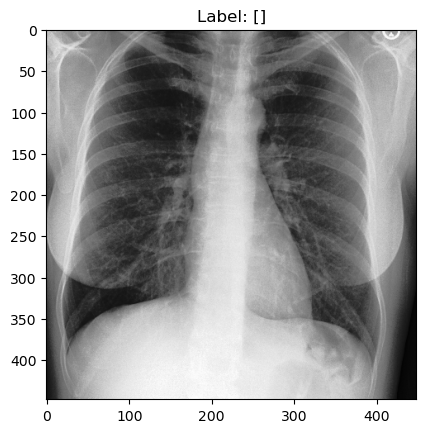

patient ^: {'subject_id': b'18430568', 'study_id': b'59496683', 'dicom_id': b'52539393-cb6de385-ac4cebc0-5282f41d-1e752cd9'}




In [5]:
# Visualize the images and labels for 1 batch

for batch in batched_tfds.take(2):
    for i in range(len(batch['image'])):
        image = batch['image'][i]
        if -1 in batch['label'][i]:
            print('**** has ambiguous label')
        label_idx = np.where(batch['label'][i] == 1)
        labels = class_names[label_idx]
        info = batch['info'][i].numpy()
        info_dict = {'subject_id': info[0], 'study_id': info[1], 'dicom_id': info[2]}

        # Display the image, label, and info
        plt.imshow(image, cmap='gray')  # Assuming grayscale images
        plt.title(f"Label: {labels}")
        plt.show()
        print('patient ^:', info_dict)
        print('\n')
